In [ ]:
import genetic_algorithm.transforms as transforms
import genetic_algorithm.population as population
import genetic_algorithm.optimize as optimize
import genetic_algorithm.utility as utility
import pandas as pd
import numpy as np
import genetic_algorithm.visualization as visualization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import genetic_algorithm.evaluation as evaluation


data = pd.read_csv("../data/ES15.csv")
x_raw_presplit = data.values

x_raw, x_ind = train_test_split(x_raw_presplit, test_size=0.1, shuffle=False)

dirpath = utility.fetch_new_run_dirpath()



pop = population.generate_random_forest(250, 12)

np.seterr(all='ignore')
best_forest, best_scores, best_overtime = optimize.optimize_constants(
    pop, x_raw, sthresh_q=.1, run_dir=dirpath
)

img = visualization.visualize_tree(best_forest[best_scores.index(min(best_scores))], run_dir=dirpath)
newforest , newscores = population.extract_n_best_trees(best_forest, best_scores, -1, run_dir=dirpath)



x_ = transforms.forest2features(
    population=newforest,
    x_raw=x_raw
)

xind_ = transforms.forest2features(
    population=newforest,
    x_raw=x_ind
)

ynew = np.roll(x_raw[:, 3], shift=-1)
y_ = np.log(ynew / x_raw[:, 3])

ynew_ind = np.roll(x_ind[:, 3], shift=-1)
yind_ = np.log(ynew_ind / x_ind[:, 3])

X_train, X_test, y_train, y_test = train_test_split(x_, y_, test_size=0.3, shuffle=False)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
xind_ = scaler.transform(xind_)

model, history = evaluation.standard_NN_construction(X_train, y_train)
evaluation.standard_NN_evaluation(X_train, X_test, y_train, y_test, model, history, dirpath)
evaluation.standard_NN_evaluation(X_train, xind_, y_train, yind_, model, history, dirpath)

In [ ]:
import genetic_algorithm.utility as utility

best_forest, best_scores = utility.demo_constopt_nn()

In [ ]:
import genetic_algorithm.reproduction as reproduction

best_forest = reproduction.reproduce(best_forest, best_scores, (0,1,0,0))

In [ ]:
best_forest, best_scores = utility.demo_constopt_nn(best_forest)

In [ ]:
best_forest = reproduction.reproduce(best_forest, best_scores, (0,1,0,0))


In [ ]:
best_forest, best_scores = utility.demo_constopt_nn(best_forest)

In [ ]:
import genetic_algorithm.transforms as transforms
import genetic_algorithm.population as population
import genetic_algorithm.optimize as optimize
import genetic_algorithm.utility as utility
import pandas as pd
import numpy as np
import genetic_algorithm.visualization as visualization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import genetic_algorithm.evaluation as evaluation


data = pd.read_csv("../data/ES15.csv")
x_raw = data.values


dirpath = utility.fetch_new_run_dirpath()

np.seterr(invalid='raise',divide='raise')

pop = population.generate_random_forest(250, 8)


best_forest, best_scores, best_overtime = optimize.optimize_constants(
    pop, x_raw, sthresh_q=.1, run_dir=dirpath
)

In [ ]:
print([i for i in best_scores])

In [1]:
import genetic_algorithm.optimize as optimize

x, loss, path = optimize.optimize_reproduction(
    25, 5, iterations=25, init_x=(0.5, 0.25)
)

2025-07-18 16:41:22.003530: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-18 16:41:22.004220: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-18 16:41:22.007232: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-18 16:41:22.014448: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752871282.026041  219396 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752871282.02

Expected to die: 21 @ Iteration #1
Expected to die: 21 @ Iteration #2
Expected to die: 21 @ Iteration #3
Expected to die: 21 @ Iteration #1
Expected to die: 22 @ Iteration #2
Expected to die: 22 @ Iteration #3


E0000 00:00:1752871300.715637  219396 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1752871300.717468  219396 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step
init: [0.5  0.25], 1.0
iter: 0
Expected to die: 21 @ Iteration #1
Expected to die: 22 @ Iteration #2
Expected to die: 21 @ Iteration #3
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 1s 547us/step
cndt: [0.46490872 0.15635919], 0.7505661030844174
best: [0.46490872 0.15635919], 0.7505661030844174
iter: 1
Expected to die: 21 @ Iteration #1
Expected to die: 21 @ Iteration #2
Expected to die: 21 @ Iteration #3
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step
cndt: [0.55433923 0.14625063], 0.846488330632012
best: [0.46490872 0.15635919], 0.7505661030844174
iter: 2
Expected to die: 21 @ Iteration #1
Expected to die: 21 @ Iteration #2
Expected to die: 21 @ Iteration #3
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 604us/step
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step
cndt: [0.54319216 0.1771607 ], 0.9992122199105355
best: [0.46490872 0.15635919], 0.7505

/home/logankelsch/Behavioral_Search/src/genetic_algorithm/transforms.py:1474: RuntimeWarning: invalid value encountered in divide
  np.divide(xptr[:, op_idx], x_denom[:, op_idx], out=xptr[:, op_idx])


787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step
cndt: [0.47539567 0.2365594 ], 1.0
best: [0.43681089 0.20829469], 0.6944856619884483
iter: 8
Expected to die: 21 @ Iteration #1
Expected to die: 21 @ Iteration #2
Expected to die: 21 @ Iteration #3
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 1s 543us/step
cndt: [0.39401219 0.212909  ], 0.9936825152736553
best: [0.43681089 0.20829469], 0.6944856619884483
iter: 9
Expected to die: 21 @ Iteration #1
Expected to die: 21 @ Iteration #2
Expected to die: 21 @ Iteration #3


/home/logankelsch/Behavioral_Search/src/genetic_algorithm/transforms.py:1474: RuntimeWarning: invalid value encountered in divide
  np.divide(xptr[:, op_idx], x_denom[:, op_idx], out=xptr[:, op_idx])


787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step
cndt: [0.3986308  0.20171992], 0.9591123589169673
best: [0.43681089 0.20829469], 0.6944856619884483
iter: 10
Expected to die: 21 @ Iteration #1
Expected to die: 21 @ Iteration #2
Expected to die: 21 @ Iteration #3
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step
cndt: [0.40672447 0.19067157], 0.8484447984757958
best: [0.43681089 0.20829469], 0.6944856619884483
iter: 11
Expected to die: 21 @ Iteration #1
Expected to die: 21 @ Iteration #2
Expected to die: 21 @ Iteration #3


/home/logankelsch/Behavioral_Search/src/genetic_algorithm/transforms.py:1474: RuntimeWarning: invalid value encountered in divide
  np.divide(xptr[:, op_idx], x_denom[:, op_idx], out=xptr[:, op_idx])


787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step
cndt: [0.40543067 0.20806427], 0.9908890876946209
best: [0.43681089 0.20829469], 0.6944856619884483
iter: 12
Expected to die: 21 @ Iteration #1
Expected to die: 21 @ Iteration #2
Expected to die: 21 @ Iteration #3
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step
cndt: [0.43521034 0.18009712], 1.0
best: [0.43681089 0.20829469], 0.6944856619884483
iter: 13
Expected to die: 21 @ Iteration #1
Expected to die: 21 @ Iteration #2
Expected to die: 21 @ Iteration #3
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step
cndt: [0.41239639 0.20122074], 1.0
best: [0.43681089 0.20829469], 0.6944856619884483
iter: 14
Expected to die: 22 @ Iteration #1
Expected to die: 21 @ Iteration #2
Expected to die: 21 @ Iteration #3
Expected to die: 22 @ Iteration #4
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step
n

/home/logankelsch/Behavioral_Search/src/genetic_algorithm/transforms.py:1474: RuntimeWarning: invalid value encountered in divide
  np.divide(xptr[:, op_idx], x_denom[:, op_idx], out=xptr[:, op_idx])


787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 1s 555us/step
cndt: [0.44419508 0.19522726], 0.7354233974920634
best: [0.43681089 0.20829469], 0.6944856619884483
iter: 19
Expected to die: 21 @ Iteration #1
Expected to die: 21 @ Iteration #2
Expected to die: 21 @ Iteration #3


/home/logankelsch/Behavioral_Search/src/genetic_algorithm/transforms.py:1474: RuntimeWarning: invalid value encountered in divide
  np.divide(xptr[:, op_idx], x_denom[:, op_idx], out=xptr[:, op_idx])


787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step
cndt: [0.42820441 0.21870663], 0.9069133850707302
best: [0.43681089 0.20829469], 0.6944856619884483
iter: 20
Expected to die: 21 @ Iteration #1
Expected to die: 21 @ Iteration #2
Expected to die: 21 @ Iteration #3


/home/logankelsch/Behavioral_Search/src/genetic_algorithm/transforms.py:1474: RuntimeWarning: invalid value encountered in divide
  np.divide(xptr[:, op_idx], x_denom[:, op_idx], out=xptr[:, op_idx])


787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 1s 555us/step
cndt: [0.44611846 0.21611632], 0.9338331091996213
best: [0.43681089 0.20829469], 0.6944856619884483
iter: 21
Expected to die: 21 @ Iteration #1
Expected to die: 21 @ Iteration #2
Expected to die: 22 @ Iteration #3


/home/logankelsch/Behavioral_Search/src/genetic_algorithm/transforms.py:1474: RuntimeWarning: invalid value encountered in divide
  np.divide(xptr[:, op_idx], x_denom[:, op_idx], out=xptr[:, op_idx])


787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step
cndt: [0.43957437 0.19770751], 0.9425621442215824
best: [0.43681089 0.20829469], 0.6944856619884483
iter: 22
Expected to die: 21 @ Iteration #1
Expected to die: 21 @ Iteration #2
Expected to die: 22 @ Iteration #3
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 604us/step
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step
cndt: [0.42884336 0.20250713], 0.9239229805880953
best: [0.43681089 0.20829469], 0.6944856619884483
iter: 23
Expected to die: 22 @ Iteration #1
Expected to die: 22 @ Iteration #2
Expected to die: 22 @ Iteration #3
787/787 ━━━━━━━━━━━━━━━━━━━━ 1s 628us/step
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step
cndt: [0.43664403 0.21715605], 1.0
best: [0.43681089 0.20829469], 0.6944856619884483
iter: 24
Expected to die: 21 @ Iteration #1
Expected to die: 21 @ Iteration #2
Expected to die: 21 @ Iteration #3
787/787 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step
1836/1836 ━━━━━━━━━━━━━━━━━━━━ 1s 547us/step
cndt: [0.4297961  0.2

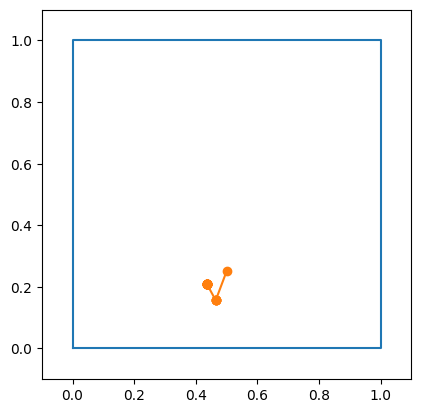

In [2]:
import genetic_algorithm.visualization as visualization

visualization.visualize_opt_path(path)